# import data

In [4]:
import zipfile
import pandas as pd


with zipfile.ZipFile("C:/Amity Notes/Celebal Internship/house-prices-advanced-regression-techniques.zip", 'r') as zip_ref:
    zip_ref.extractall("C:/Amity Notes/Celebal Internship/house-prices-data")



In [5]:
train_df = pd.read_csv("C:/Amity Notes/Celebal Internship/house-prices-data/train.csv")
test_df = pd.read_csv("C:/Amity Notes/Celebal Internship/house-prices-data/test.csv")

# shape of the data 

In [6]:
print(train_df.shape)
print(train_df.columns)


(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [7]:
train_df.info()
train_df.describe()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# check null values

In [8]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

# Drop columns with >40% missing

In [10]:
drop_cols = missing[missing > len(train_df) * 0.4].index
train_df.drop(columns=drop_cols, inplace=True)

# Fill missing values

In [11]:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    else:
        train_df[col].fillna(train_df[col].median(), inplace=True)

C:\Users\j s\AppData\Local\Temp\ipykernel_5220\2313265897.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)
C:\Users\j s\AppData\Local\Temp\ipykernel_5220\2313265897.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

# One-Hot Encode categorical variables

In [14]:
train_df = pd.get_dummies(train_df, drop_first=True)

# Log-transform skewed features

In [16]:
import numpy as np
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])
skewed_feats = train_df.skew().sort_values(ascending=False)
skewed_feats = skewed_feats[skewed_feats > 0.75]
for col in skewed_feats.index:
    train_df[col] = np.log1p(train_df[col])

# StandardScale

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop('SalePrice', axis=1))


# split data

In [22]:
from sklearn.model_selection import train_test_split

X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# correlation matrix

In [30]:
import numpy as np
import pandas as pd
scaled_features_df = pd.DataFrame(scaled_features)
corr_matrix = scaled_features_df.corr(numeric_only=True)

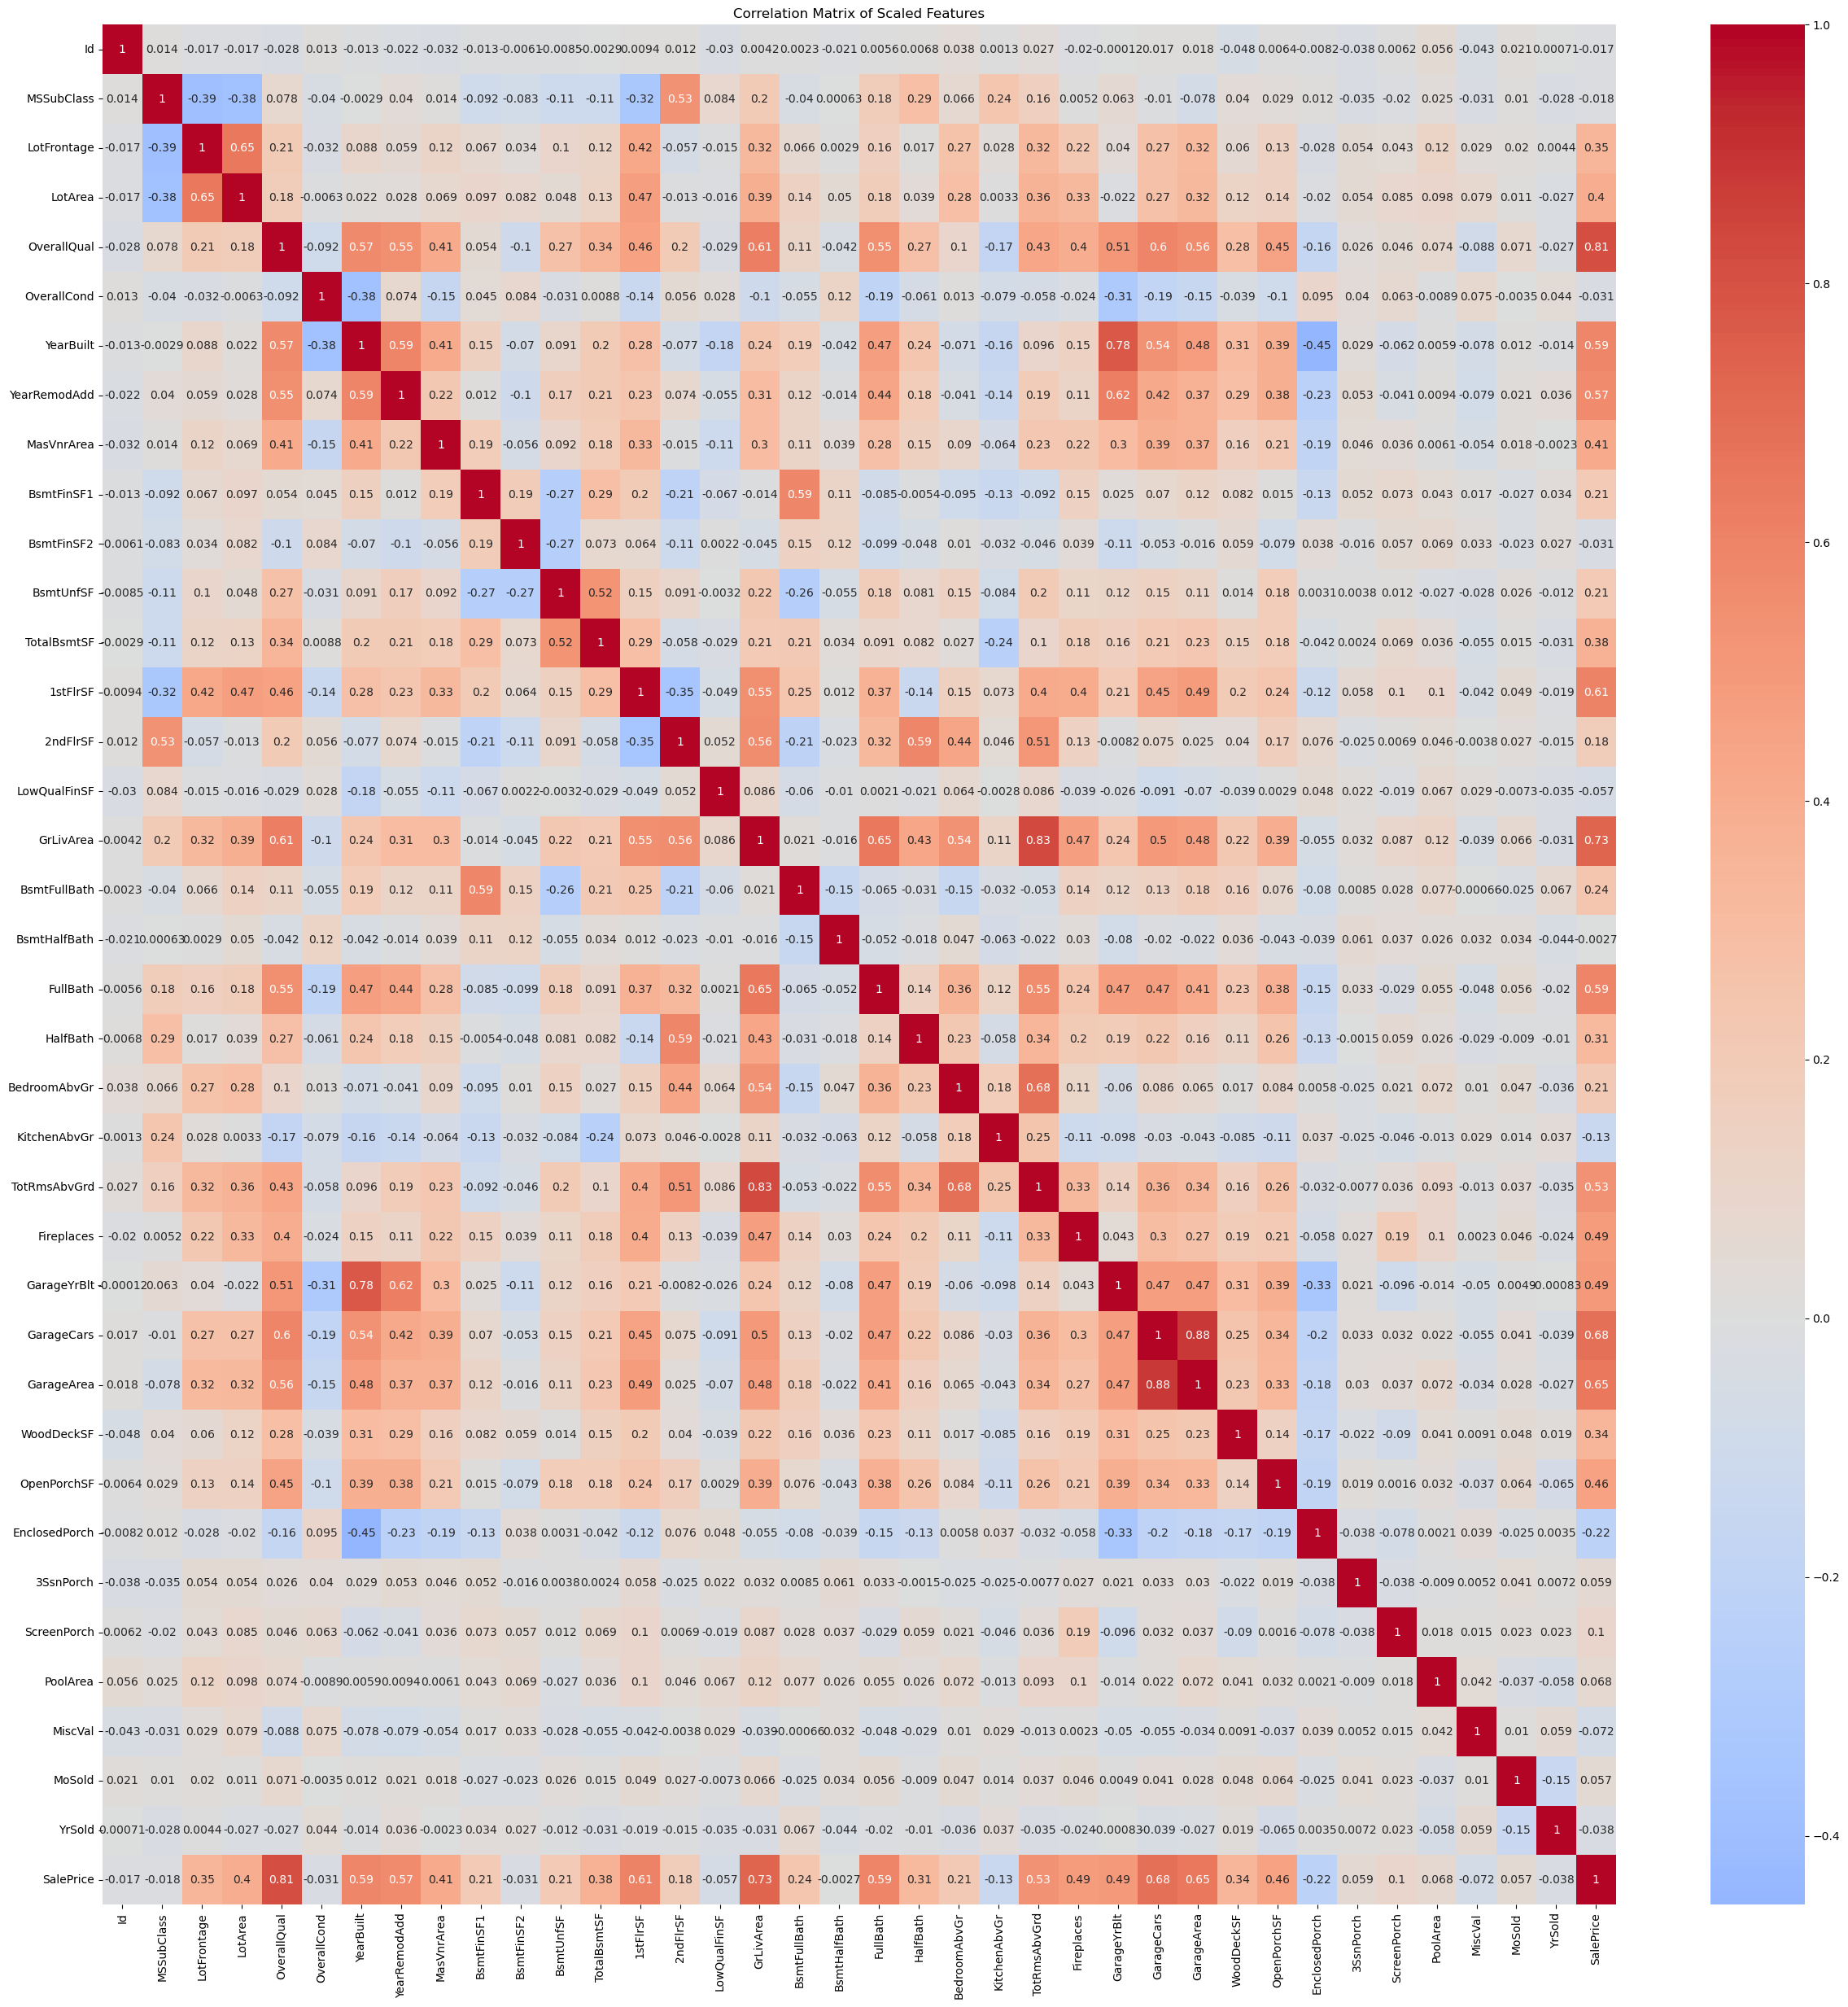

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Scaled Features")
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Define top_n variable before using it
top_n = 5  # You can change this to any number you want

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(top_n).index.tolist()

In [26]:
print(feature_importances)
print(top_features)

Id                       0.004554
MSSubClass               0.002305
LotFrontage              0.006198
LotArea                  0.012809
OverallQual              0.547048
                           ...   
SaleCondition_AdjLand    0.000004
SaleCondition_Alloca     0.000182
SaleCondition_Family     0.000628
SaleCondition_Normal     0.000992
SaleCondition_Partial    0.000244
Length: 230, dtype: float64
['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF']
